In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api                      as     sm
import scipy.stats                          as     stats
from   sklearn                              import datasets
from   sklearn.metrics                      import mean_squared_error
from   sklearn.preprocessing                import PolynomialFeatures
from   sklearn.linear_model                 import LinearRegression
from   sklearn                              import linear_model
from   sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [6]:
dff = pd.read_csv('RetailTurnover.csv')
dff.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [7]:
dates=pd.date_range(start='9/1/1982',freq='Q',periods=len(dff))
print(dates)

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')


In [ ]:
import calendar
df['Month']=dates.month
df.head()

In [ ]:
df['Month']=df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Month'].head()

In [16]:
df['Year']=dates.year
df['Year'].head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: Year, dtype: int64

In [17]:
df.head()

,Date,Sales,Month,Year
0,Jan-95,1664.81,Jan,1995
1,Feb-95,2397.53,Feb,1995
2,Mar-95,2840.71,Mar,1995
3,Apr-95,3547.29,Apr,1995
4,May-95,3752.96,May,1995


In [9]:
dff.index=dates
df=dff[['Turnover']]
df.head()

,Turnover
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


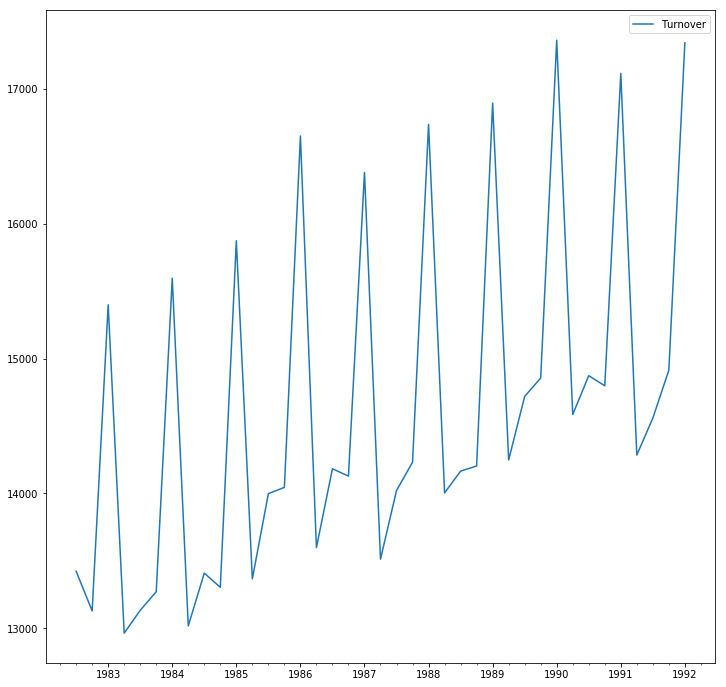

In [10]:
df.plot(figsize=(12,12))
plt.show()

Every 1st Quarter of the year shows a peak turnover , probably because of New year sale 

In [11]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

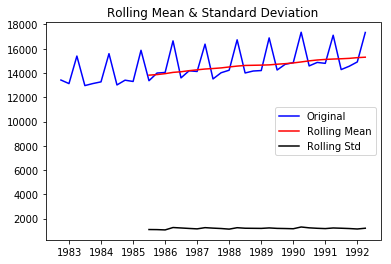

In [12]:
test_stationarity(df.Turnover)

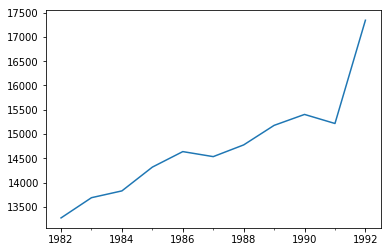

In [19]:
df.Turnover.resample('A').mean().plot()     # the mean is changing every year 

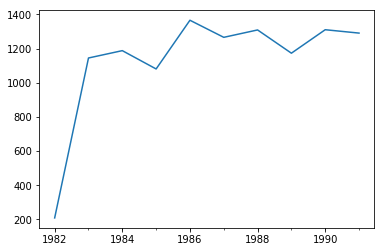

In [15]:
df.Turnover.resample('A').std().plot()      # the SD is changing every year 

In [16]:
df.describe()

,Turnover
count,39.000000
mean,14623.169231
std,1298.925539
min,12964.200000
25%,13555.600000
50%,14231.800000
75%,15156.550000
max,17361.600000


In [17]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('RetailTurnover.csv', header=0)
X = series.Turnover
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.983984
p-value: 0.759061
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618


Test stat is greater than critical value so we fail to reject null hypothesis

The data is non-stationary 

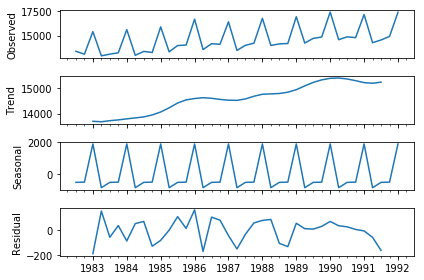

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Turnover'],model='additive')
x = decomposed.plot()

In [40]:
resadd = decomposed.resid
resadd = resadd.dropna()

In [41]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = resadd
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.279977
p-value: 0.000481
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628


The test stat is less than 1% critical value 

So we are 99% confident that the data is stationary 

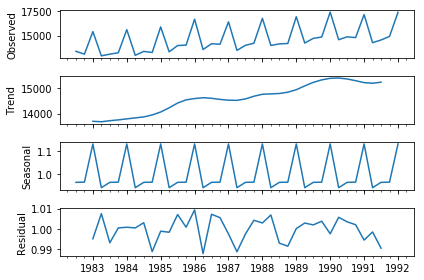

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Turnover'],model='multiplicative')
x = decomposed.plot()

In [49]:
resmul = decomposed.resid
resmul = resmul.dropna()

In [50]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = resmul
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.279977
p-value: 0.000481
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628


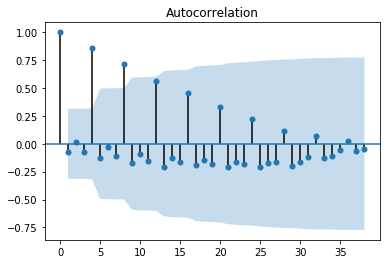

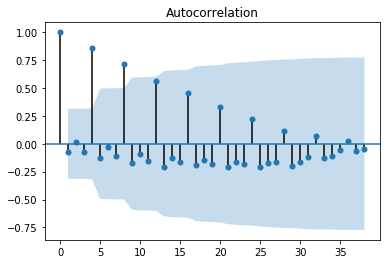

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Turnover'])

The ACF plots show gradual decay indicating this as a non-stationary series 

There are 3 peaks outside the confidence interval so modelling with 3 MA terms (q) should reduce the stationarity 

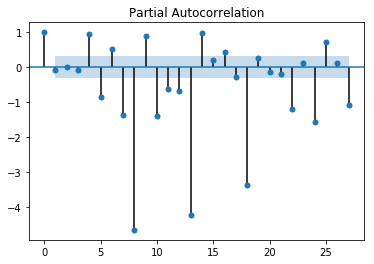

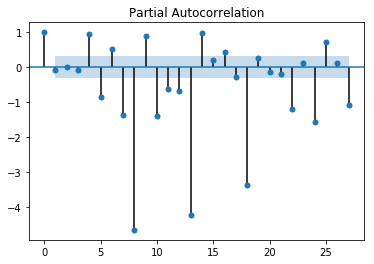

In [281]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Turnover'],lags =27)

The PACF plot gives 5 values outside the confidence region 

So the usage of 5 AR terms (p) should ideally make it stationary 

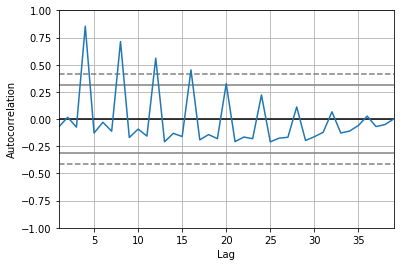

In [282]:
pd.plotting.autocorrelation_plot(df['Turnover'])

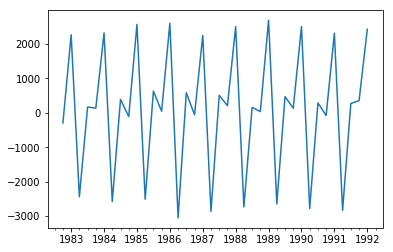

In [286]:
dff['stationary'] = df['Turnover'].diff()
dff.stationary.plot()

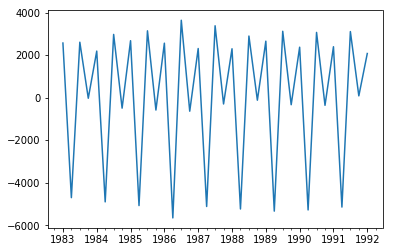

In [292]:
dff['stationary1'] = dff['stationary'].diff()
dff.stationary1.plot()

In [290]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = dff['stationary1'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -79.775671
p-value: 0.000000
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [171]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]
# train

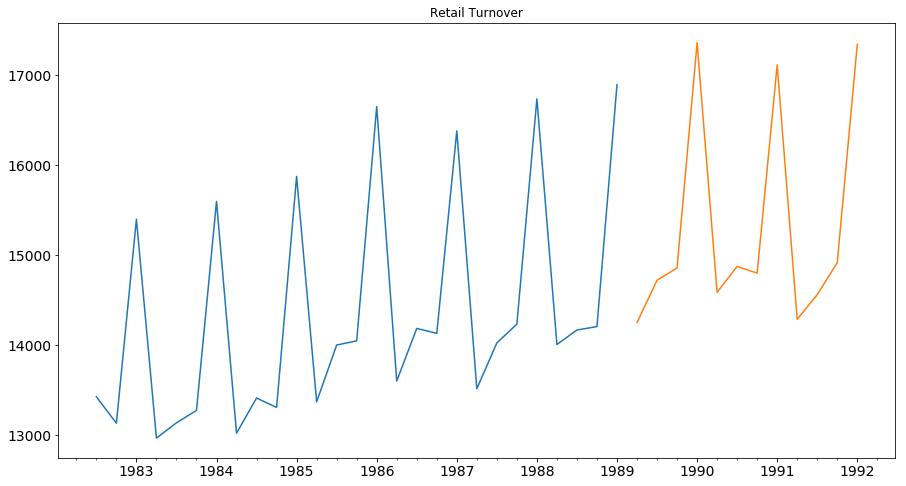

In [219]:
train.Turnover.plot(figsize=(15,8), title= 'Retail Turnover', fontsize=14)
test.Turnover.plot(figsize=(15,8), title= 'Retail Turnover', fontsize=14)
plt.show()

# Model 1

In [56]:
time=[i+1 for i in range (len(df))]

In [57]:
df1=df.copy()
df1['time'] = time
df1.head()

,Turnover,time
1982-09-30,13423.2,1
1982-12-31,13128.8,2
1983-03-31,15398.8,3
1983-06-30,12964.2,4
1983-09-30,13133.5,5


In [58]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [59]:
x_train = train.drop('Turnover', axis=1)
x_test = test.drop('Turnover', axis=1)
y_train = train[['Turnover']]
y_test = test[['Turnover']]

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
predictions = model.predict(x_test)

In [63]:
y_test['RegOnTime'] = predictions

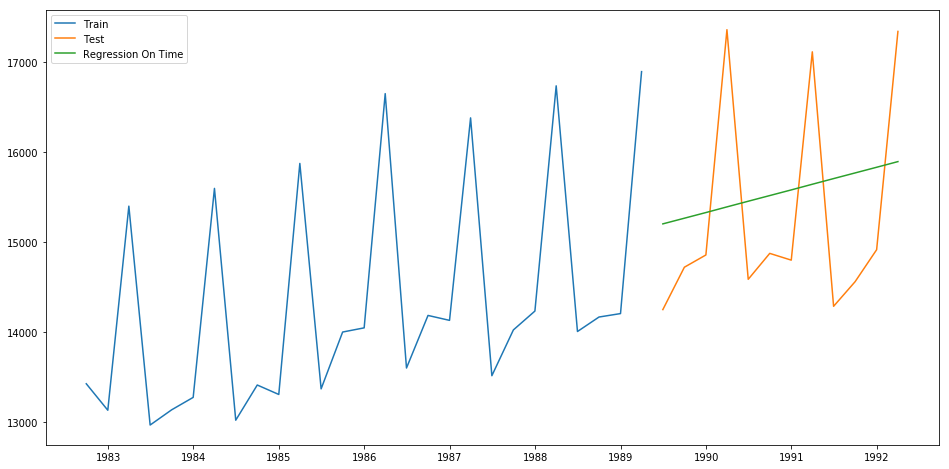

In [66]:
plt.figure(figsize=(16,8))
plt.plot(train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [68]:
rmse = np.sqrt(mean_squared_error(test.Turnover, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

1143.056

In [71]:
abs_error = np.abs(y_test['Turnover']-y_test['RegOnTime'])
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.068

In [72]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.068


In [75]:
df

,Turnover
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5
1983-12-31,13271.7
1984-03-31,15596.3
1984-06-30,13018.0
1984-09-30,13409.3
1984-12-31,13304.2


# Model 2

In [73]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time

In [220]:
df1 = dff[['Quarter','Turnover']]
df1.head(12)

,Quarter,Turnover
1982-09-30,Q3,13423.2
1982-12-31,Q4,13128.8
1983-03-31,Q1,15398.8
1983-06-30,Q2,12964.2
1983-09-30,Q3,13133.5
1983-12-31,Q4,13271.7
1984-03-31,Q1,15596.3
1984-06-30,Q2,13018.0
1984-09-30,Q3,13409.3
1984-12-31,Q4,13304.2


In [221]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(4)

,Turnover,Quarter_Q2,Quarter_Q3,Quarter_Q4
1982-09-30,13423.2,0,1,0
1982-12-31,13128.8,0,0,1
1983-03-31,15398.8,0,0,0
1983-06-30,12964.2,1,0,0


In [222]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [223]:
x_train = train.drop('Turnover', axis=1)
x_test = test.drop('Turnover', axis=1)
y_train = train[['Turnover']]
y_test = test[['Turnover']]

In [224]:
model = LinearRegression()

In [225]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [226]:
predictions = model.predict(x_test)
predictions

array([[13410.73333333],
       [13762.2       ],
       [13759.14285714],
       [16218.87142857],
       [13410.73333333],
       [13762.2       ],
       [13759.14285714],
       [16218.87142857],
       [13410.73333333],
       [13762.2       ],
       [13759.14285714],
       [16218.87142857]])

In [227]:
y_test['RegOnTimeSeasonal'] = predictions

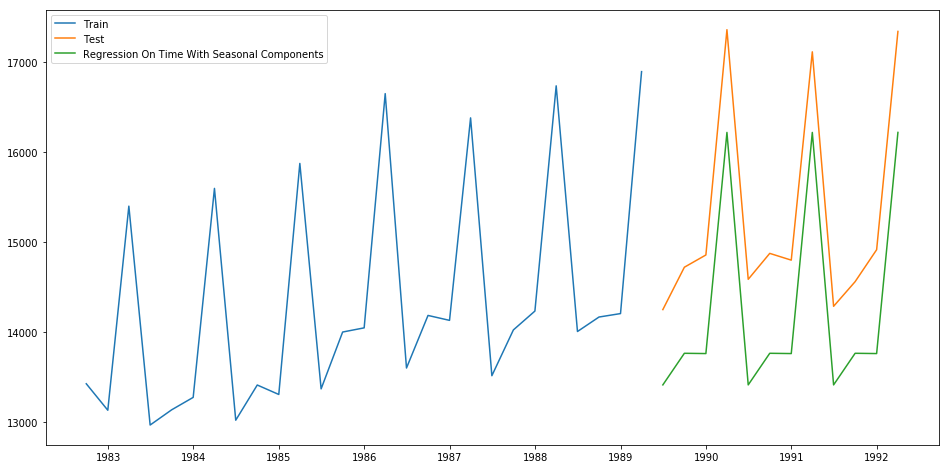

In [228]:
plt.figure(figsize=(16,8))
plt.plot( train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [229]:
rmse = sqrt(mean_squared_error(test.Turnover, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
rmse

1025.479

In [230]:
abs_error = np.abs(y_test['Turnover']-y_test['RegOnTimeSeasonal'])
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0666

In [231]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
1,RegressionOnTimeSeasonal,1143.056,0.0682
2,Naive forecast,1752.703,0.0833
3,Simple average forecast,1518.290,0.0606
4,Moving average forecast,1118.915,0.0577
5,SES forecast,1563.375,0.1009
6,SES forecast,1159.196,0.0655
7,Holt,1181.031,0.0727
8,Holt Winter forecast - Additive,269.151,0.0144
0,Holt Winter forecast - Mult,237.747,0.0141


# Model 3

In [96]:
dd= np.asarray(train.Turnover)

In [97]:
dd

array([13423.2, 13128.8, 15398.8, 12964.2, 13133.5, 13271.7, 15596.3,
       13018. , 13409.3, 13304.2, 15873.9, 13366.5, 13998.6, 14045.1,
       16650.3, 13598.4, 14183.2, 14128.5, 16380.7, 13512.8, 14022.1,
       14231.8, 16737. , 14004.5, 14165.5, 14203.9, 16895.1])

In [169]:
y_hat = test.copy()
y_hat

,Turnover,moving_avg_forecast
1989-06-30,14248.2,14878.175
1989-09-30,14719.5,15016.675
1989-12-31,14855.8,15179.650
1990-03-31,17361.6,15296.275
1990-06-30,14585.2,15380.525
1990-09-30,14873.5,15419.025
1990-12-31,14798.4,15404.675
1991-03-31,17115.2,15343.075
1991-06-30,14284.9,15268.000
1991-09-30,14558.8,15189.325


In [99]:
#y_hat['naive'] = dd[len(dd)-1]

for i in range(len(y_hat)):
    if i == 0:
        y_hat['naive'] = np.nan
    else:
        y_hat['naive'][i] = y_hat.Turnover[i-1]


C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 1.0, 'Naive Forecast')

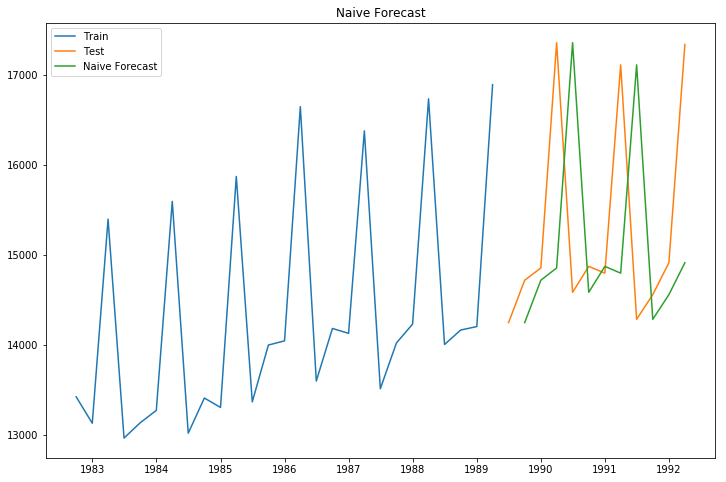

In [101]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Turnover'], label='Train')
plt.plot(test.index,test['Turnover'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [104]:
#RMSE Calculation
rmse = np.sqrt(mean_squared_error(test.Turnover[1:len(test.Turnover)], y_hat.naive[1:len(test.Turnover)]))
rmse = round(rmse, 3)
rmse

1752.703

In [107]:
abs_error = np.abs(y_test['Turnover']-y_hat.naive)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0833

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
0,RegressionOnTimeSeasonal,1143.056,0.0682
0,Naive forecast,1752.703,0.0833


# Model 4

In [109]:
y_hat_avg = test.copy()

In [110]:
y_hat_avg['avg_forecast'] = train['Turnover'].mean()

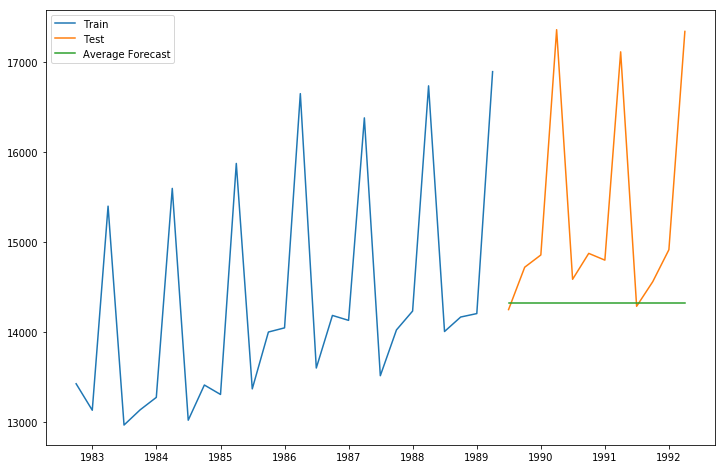

In [111]:
plt.figure(figsize=(12,8))
plt.plot(train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [112]:
rmse = sqrt(mean_squared_error(test.Turnover, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

1518.29

In [113]:
abs_error = np.abs(y_test['Turnover']-y_hat_avg.avg_forecast)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0606

In [114]:
tempResultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
0,RegressionOnTimeSeasonal,1143.056,0.0682
0,Naive forecast,1752.703,0.0833
0,Simple average forecast,1518.290,0.0606


# Model 5

In [115]:
df1 = df.copy()

In [118]:
df1['moving_avg_forecast'] = df['Turnover'].rolling(4).mean()

In [119]:
df1.head(3)

,Turnover,moving_avg_forecast
1982-09-30,13423.2,NaN
1982-12-31,13128.8,NaN
1983-03-31,15398.8,NaN


In [120]:
df1.tail(3)

,Turnover,moving_avg_forecast
1991-09-30,14558.8,15189.325
1991-12-31,14914.3,15218.300
1992-03-31,17342.3,15275.075


In [121]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [122]:
y_hat_avg = test.copy()

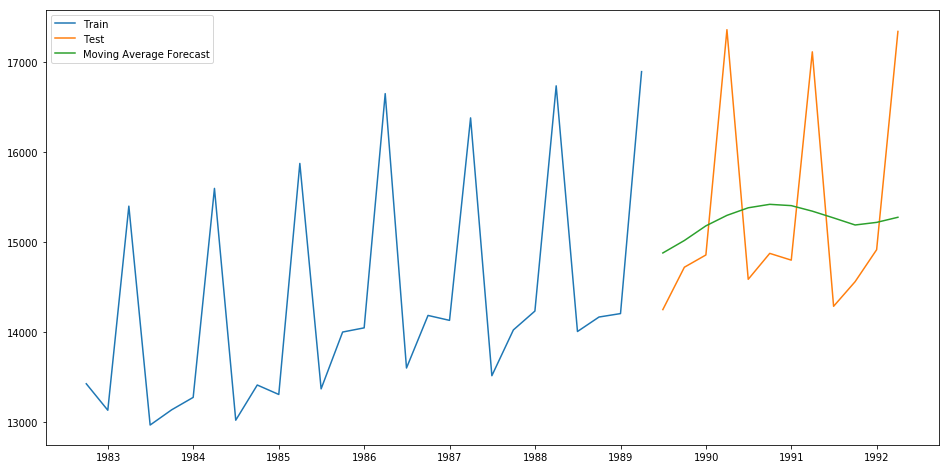

In [124]:
plt.figure(figsize=(16,8))
plt.plot(train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [125]:
y_hat_avg.moving_avg_forecast

1989-06-30    14878.175
1989-09-30    15016.675
1989-12-31    15179.650
1990-03-31    15296.275
1990-06-30    15380.525
1990-09-30    15419.025
1990-12-31    15404.675
1991-03-31    15343.075
1991-06-30    15268.000
1991-09-30    15189.325
1991-12-31    15218.300
1992-03-31    15275.075
Freq: Q-DEC, Name: moving_avg_forecast, dtype: float64

In [127]:
rmse = sqrt(mean_squared_error(test.Turnover, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

1118.915

In [128]:
abs_error = np.abs(y_test['Turnover']-y_hat_avg.moving_avg_forecast)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0577

In [129]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
0,RegressionOnTimeSeasonal,1143.056,0.0682
0,Naive forecast,1752.703,0.0833
0,Simple average forecast,1518.290,0.0606
0,Moving average forecast,1118.915,0.0577


# Model 6

In [131]:
# create class
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(train['Turnover'])

In [141]:
# fit model
model_fit = model.fit(smoothing_level=0.4,optimized=False)
model_fit.params

{'smoothing_level': 0.4,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 13423.2,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [142]:
y_hat_avg = test.copy()

In [143]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Turnover']))

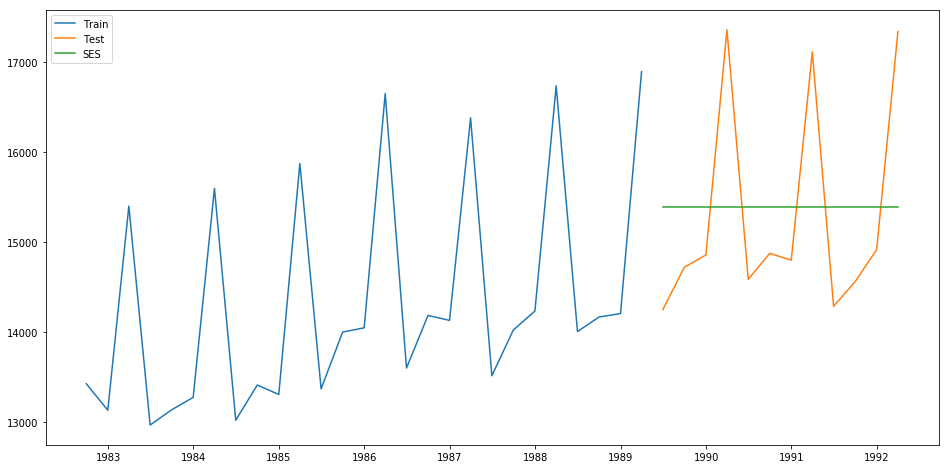

In [144]:
plt.figure(figsize=(16,8))
plt.plot(train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [145]:
rmse = sqrt(mean_squared_error(test.Turnover, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

1159.196

In [146]:
abs_error = np.abs(y_test['Turnover']-y_hat_avg.SES)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0655

In [147]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
0,RegressionOnTimeSeasonal,1143.056,0.0682
0,Naive forecast,1752.703,0.0833
0,Simple average forecast,1518.290,0.0606
0,Moving average forecast,1118.915,0.0577
0,SES forecast,1563.375,0.1009
0,SES forecast,1159.196,0.0655


In [140]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in alpha:
    model_fit = model.fit(smoothing_level=i,optimized=False)
    ap_ES = test.copy()
    ap_ES['SES'] = model_fit.forecast(len(test['Turnover']))
    rmse = np.sqrt(mean_squared_error(test.Turnover, ap_ES.SES))
    rmse = round(rmse, 3)
    print('The RMSE Value for i',i,'is : ',rmse)

The RMSE Value for i 0.1 is :  1343.794
The RMSE Value for i 0.2 is :  1203.993
The RMSE Value for i 0.3 is :  1161.785
The RMSE Value for i 0.4 is :  1159.196
The RMSE Value for i 0.5 is :  1195.893
The RMSE Value for i 0.6 is :  1276.23
The RMSE Value for i 0.7 is :  1400.555
The RMSE Value for i 0.8 is :  1563.375
The RMSE Value for i 0.9 is :  1755.135
The RMSE Value for i 1.0 is :  1965.913


# Model 7

In [148]:
fit1 = ExponentialSmoothing(np.asarray(train['Turnover']) ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.21052631578947367,
 'smoothing_slope': 0.21052631578947367,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 13423.2,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [149]:
y_hat_avg['Holt'] = fit1.forecast(len(test))

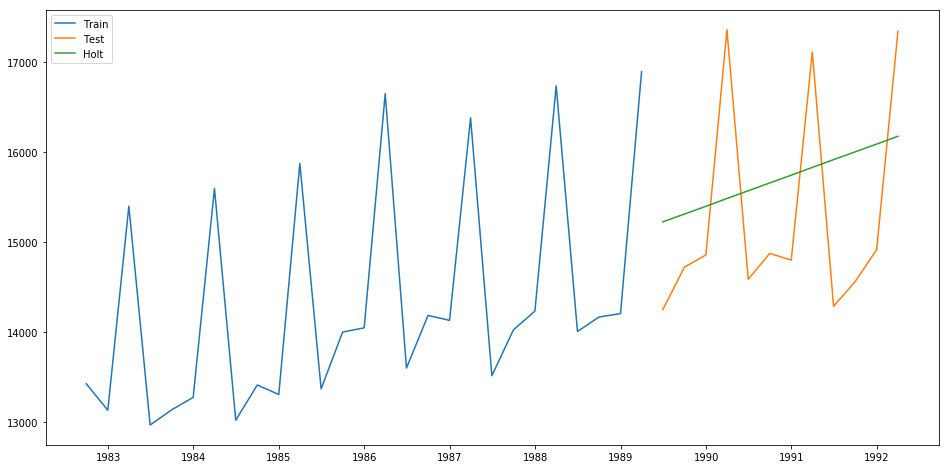

In [150]:
plt.figure(figsize=(16,8))
plt.plot( train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [151]:
rmse = sqrt(mean_squared_error(test.Turnover, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

1181.031

In [152]:
abs_error = np.abs(y_test['Turnover']-y_hat_avg.Holt)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0727

In [153]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
0,RegressionOnTimeSeasonal,1143.056,0.0682
0,Naive forecast,1752.703,0.0833
0,Simple average forecast,1518.290,0.0606
0,Moving average forecast,1118.915,0.0577
0,SES forecast,1563.375,0.1009
0,SES forecast,1159.196,0.0655
0,Holt,1181.031,0.0727


# Model 8

In [140]:
y_hat_avg = test.copy()

In [154]:
fit1 = ExponentialSmoothing(np.asarray(train['Turnover']) ,seasonal_periods=4 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.5789473660664202,
 'smoothing_slope': 0.05126124392139452,
 'smoothing_seasonal': 0.42105262922431486,
 'damping_slope': nan,
 'initial_level': 13766.941140048144,
 'initial_slope': 45.6103438759196,
 'initial_seasons': array([-348.83872944, -623.166024  , 1644.74680746, -801.81546292]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [155]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

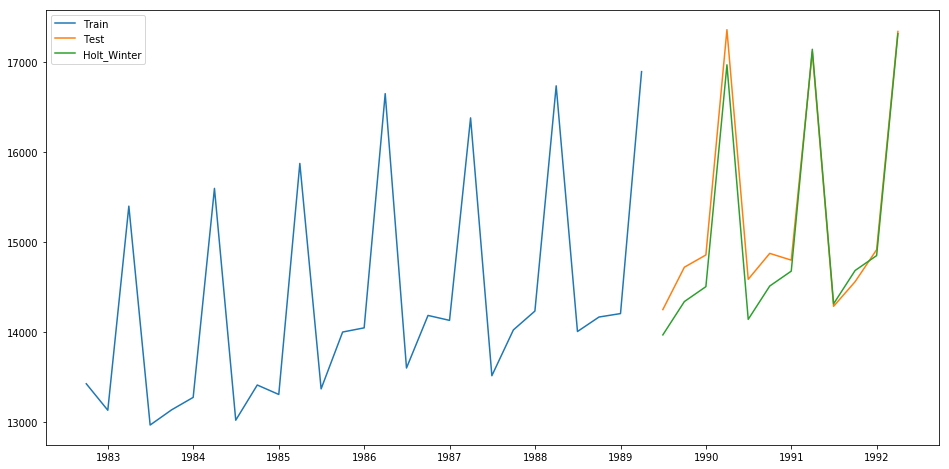

In [156]:
plt.figure(figsize=(16,8))
plt.plot( train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [157]:
rmse = sqrt(mean_squared_error(test.Turnover, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

269.151

In [158]:
abs_error = np.abs(y_test['Turnover']-y_hat_avg.Holt_Winter)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0144

In [159]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
0,RegressionOnTimeSeasonal,1143.056,0.0682
0,Naive forecast,1752.703,0.0833
0,Simple average forecast,1518.290,0.0606
0,Moving average forecast,1118.915,0.0577
0,SES forecast,1563.375,0.1009
0,SES forecast,1159.196,0.0655
0,Holt,1181.031,0.0727
0,Holt Winter forecast - Additive,269.151,0.0144


In [160]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
1,RegressionOnTimeSeasonal,1143.056,0.0682
2,Naive forecast,1752.703,0.0833
3,Simple average forecast,1518.290,0.0606
4,Moving average forecast,1118.915,0.0577
5,SES forecast,1563.375,0.1009
6,SES forecast,1159.196,0.0655
7,Holt,1181.031,0.0727
8,Holt Winter forecast - Additive,269.151,0.0144


In [162]:
fit1 = ExponentialSmoothing(np.asarray(train['Turnover']) ,seasonal_periods=4 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.8616268969362277,
 'smoothing_slope': 1.0764598577847541e-08,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 13762.184861712862,
 'initial_slope': 40.2483754359534,
 'initial_seasons': array([0.96946177, 0.96662542, 1.13622194, 0.94300973]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [163]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

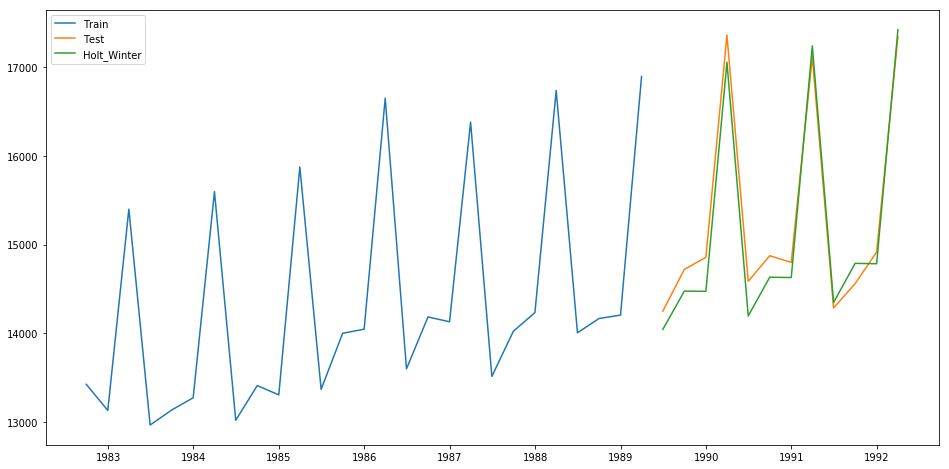

In [164]:
plt.figure(figsize=(16,8))
plt.plot( train['Turnover'], label='Train')
plt.plot(test['Turnover'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [165]:
rmse = sqrt(mean_squared_error(test.Turnover, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

237.747

In [166]:
abs_error = np.abs(y_test['Turnover']-y_hat_avg.Holt_Winter)
actual = y_test['Turnover']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0141

In [167]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,1143.056,0.0680
1,RegressionOnTimeSeasonal,1143.056,0.0682
2,Naive forecast,1752.703,0.0833
3,Simple average forecast,1518.290,0.0606
4,Moving average forecast,1118.915,0.0577
5,SES forecast,1563.375,0.1009
6,SES forecast,1159.196,0.0655
7,Holt,1181.031,0.0727
8,Holt Winter forecast - Additive,269.151,0.0144
0,Holt Winter forecast - Mult,237.747,0.0141


# ARIMA 

In [21]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]
# train
# test

In [22]:
p = d = q = range(0,6)

In [23]:
import itertools

pdq = list(itertools.product(p,d,q))
pdq

import warnings 
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model = ARIMA(train,order = param)
        modelfit = model.fit()
        print(param,modelfit.aic)
    except:
        continue

In [24]:
from statsmodels.tsa.arima_model import ARIMA



model = ARIMA(train,order = (3,2,0))
modelfit = model.fit()
modelfit.aic

401.5737972625832

In [25]:
pred = modelfit.forecast(steps=12)[0]
pred

array([14183.52140796, 14364.26900965, 14422.46969443, 17134.64409734,
       14443.98718591, 14644.48263855, 14722.48373548, 17455.63229201,
       14785.89733375, 15006.14088669, 15103.94212328, 17858.064584  ])

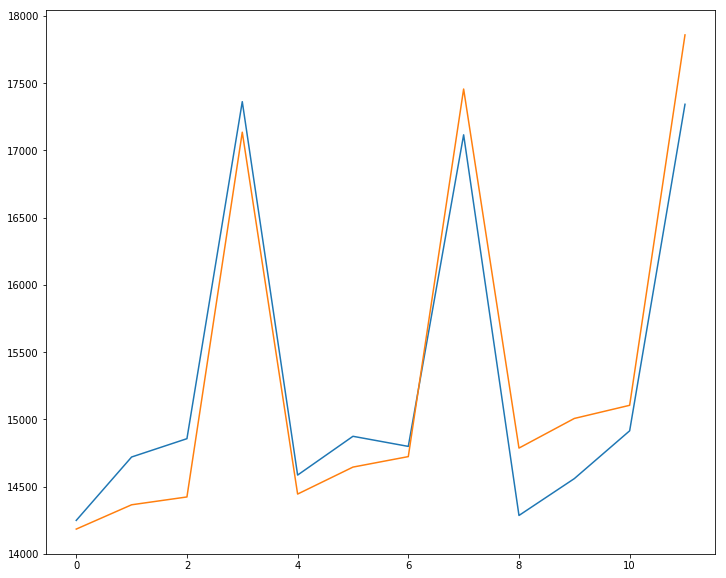

In [34]:
plt.figure(figsize=(12,10))
plt.plot(np.asarray(test))
plt.plot(pred)

In [27]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D2.Turnover   No. Observations:                   25
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -195.787
Method:                       css-mle   S.D. of innovations            206.896
Date:                Tue, 18 Jun 2019   AIC                            401.574
Time:                        12:53:33   BIC                            407.668
Sample:                    03-31-1983   HQIC                           403.264
                         - 03-31-1989                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0903        nan        nan        nan         nan         nan
ar.L1.D2.Turnover    -0.9998        nan        nan        nan         nan         nan
ar.L2.D2.Turnover    -0.9998        nan        nan        nan         nan         nan
ar.L3.D2.Turnover    -1.0000   1.97e-06  -5.07e+05      0.000      -1.000      -1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           -0.0000j            1.0000           -0.5000
AR.2            0.0001           -1.0000j            1.0000           -0.2500
AR.3            0.0001           +1.0000j            1.0000            0.2500
-----------------------------------------------------------------------------
"""

In [20]:
resid = test.values.T - pred
resid = pd.DataFrame(resid)
resid = resid.T


NameError: name 'test' is not defined

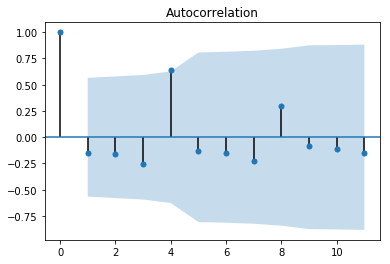

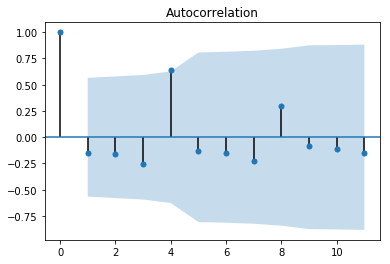

In [277]:
plot_acf(pred)


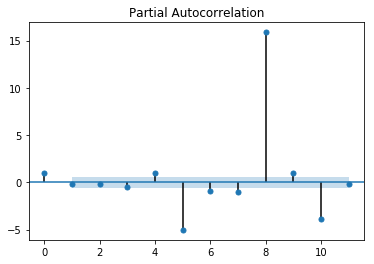

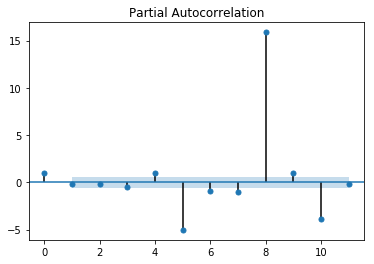

In [263]:
plot_pacf(pred)

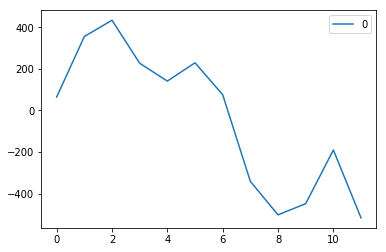

In [234]:
resid.plot()

In [2]:
# !pip install pmdarima

# Seasonal ARIMA

In [3]:
# import pmdarima as pmd

# ##  p,d,q values for the ARIMA, and P,D,Q values for the Seasonal component.

# stepwise_model = pmd.auto_arima(df, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

In [1]:
# !pip install voila